<a href="https://colab.research.google.com/github/ranjithtg-omr/AI_ML_RANJITH/blob/main/Assignment_on_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Data Preprocessing**

Handling Missing Values

Encoding Categorical Variables

Outlier Detection and Treatment:

Scaling Numerical Features:

In [ ]:
# Load the dataset from the user's CSV file
data = pd.read_csv('/content/adult_dataset.csv')



In [ ]:
# Display initial info
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             46400 non-null  float64
 1   workclass       45480 non-null  object 
 2   fnlwgt          48842 non-null  int64  
 3   education       48842 non-null  object 
 4   education-num   48842 non-null  int64  
 5   marital-status  48842 non-null  object 
 6   occupation      45485 non-null  object 
 7   relationship    48842 non-null  object 
 8   race            48842 non-null  object 
 9   sex             48842 non-null  object 
 10  capital-gain    48842 non-null  int64  
 11  capital-loss    48842 non-null  int64  
 12  hours-per-week  46400 non-null  float64
 13  native-country  46137 non-null  object 
 14  income          48842 non-null  object 
dtypes: float64(2), int64(4), object(9)
memory usage: 5.6+ MB
None


In [ ]:
print(data.head())


    age         workclass  fnlwgt  education  education-num  \
0  39.0         State-gov   77516  Bachelors             13   
1  50.0  Self-emp-not-inc   83311  Bachelors             13   
2  38.0           Private  215646    HS-grad              9   
3  53.0           Private  234721       11th              7   
4  28.0           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0            40.0            NaN  <=50K  
1             0             0       

In [ ]:
print(data.isnull().sum())

# Use df for processing
df = data.copy()

age               2442
workclass         3362
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        3357
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week    2442
native-country    2705
income               0
dtype: int64


In [ ]:
# Separate numerical and categorical columns
numerical_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Impute missing values
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# Handle outliers using IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_bound, upper_bound)

# Encode categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_cats = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))

# Scale numerical features
scaler = StandardScaler()
scaled_nums = scaler.fit_transform(df[numerical_cols])
scaled_df = pd.DataFrame(scaled_nums, columns=numerical_cols)

# Combine processed features (exclude income for unsupervised learning)
processed_df = pd.concat([scaled_df, encoded_df], axis=1)

original_df = df.copy()
print(processed_df.shape)

(48842, 108)


**Exploratory Analysis**

**Visualize Feature Distributions**

Histograms for numerical features and count plots for categorical to understand distributions.

**Analyze Correlations**

Heatmap for numerical features to check multicollinearity.

**Dimensionality Reduction**

PCA to reduce to 2D for visualization of high-dimensional data.

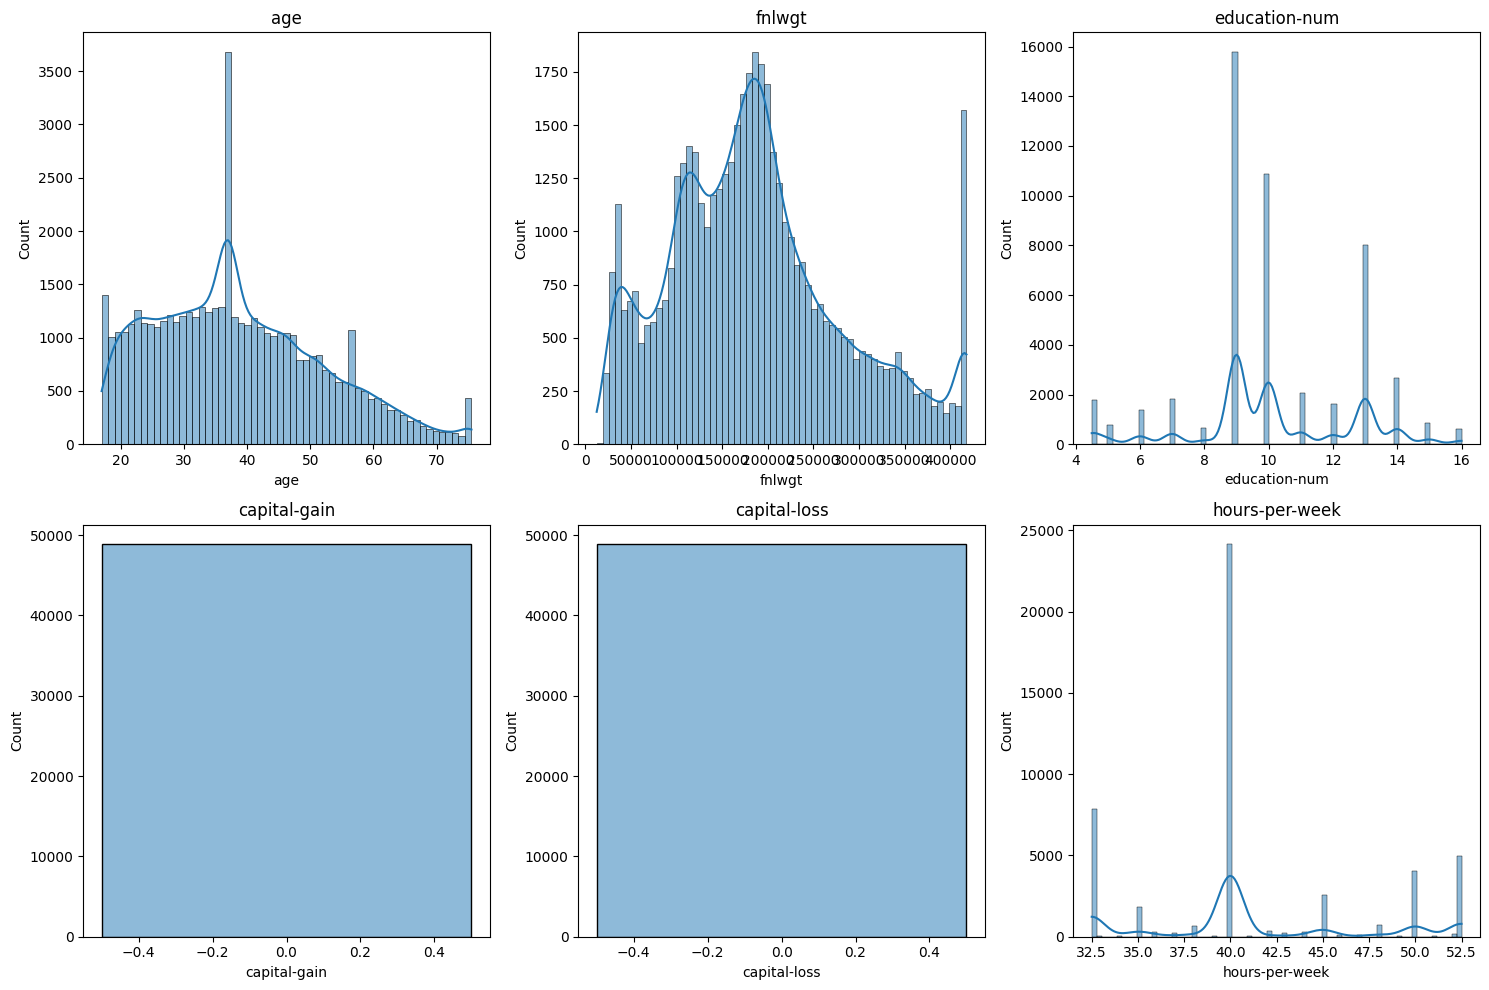

In [ ]:
# Visualize numerical distributions
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(original_df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

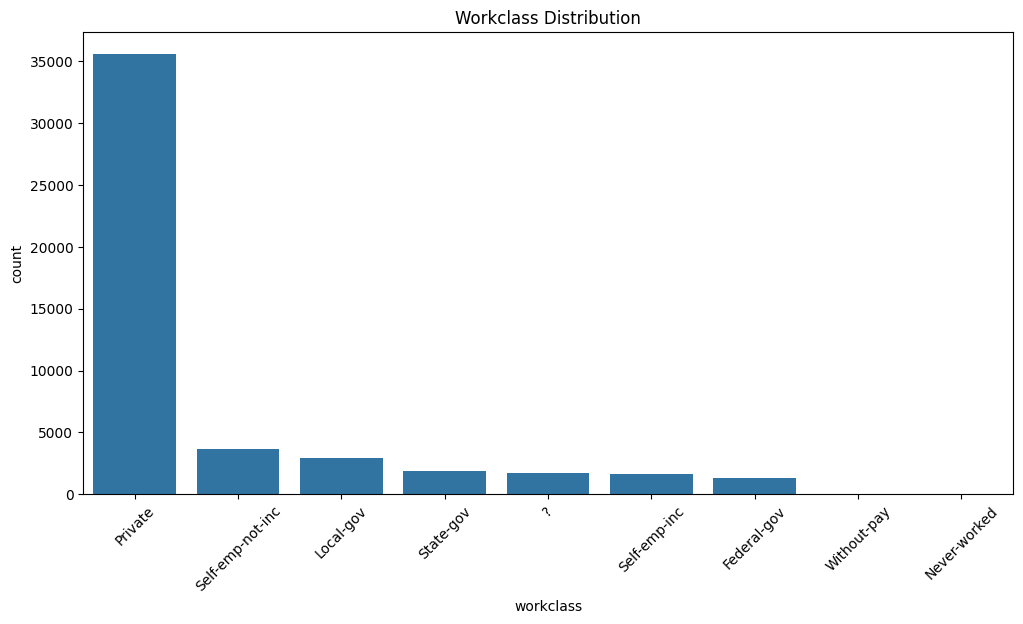

In [ ]:
# Visualize categorical distributions (example for a few)
plt.figure(figsize=(12, 6))
sns.countplot(data=original_df, x='workclass', order=original_df['workclass'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Workclass Distribution')
plt.show()


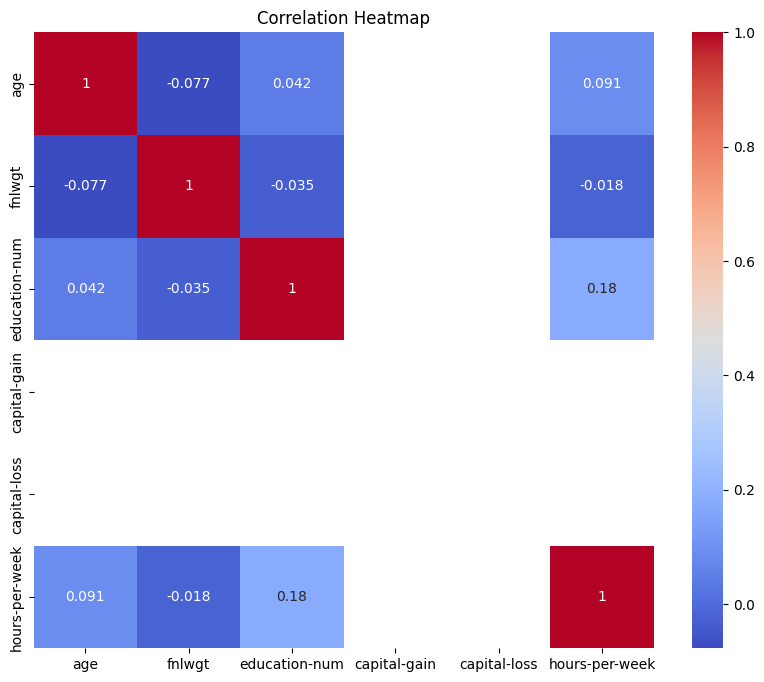

In [ ]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(original_df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

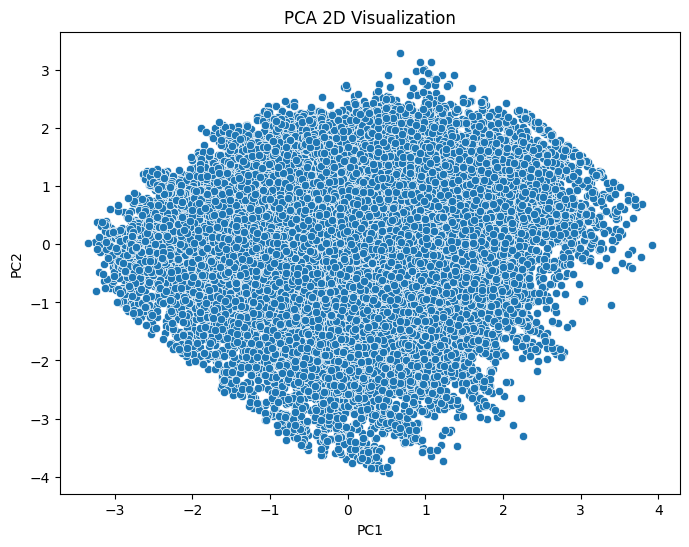

Explained variance ratio: [0.17923082 0.13195151]


In [ ]:
# PCA for 2D visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(processed_df)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA 2D Visualization')
plt.show()

print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

**Clustering**

In [ ]:
# Subsample the data for faster elbow and silhouette (adjust n_samples as needed, e.g., 5000-10000)
sample_fraction = 0.2  # 20% sample
processed_sample = resample(processed_df, n_samples=int(sample_fraction * len(processed_df)), random_state=42)
print(f'Using sample of size {len(processed_sample)} for hyperparameter selection')

Using sample of size 9768 for hyperparameter selection


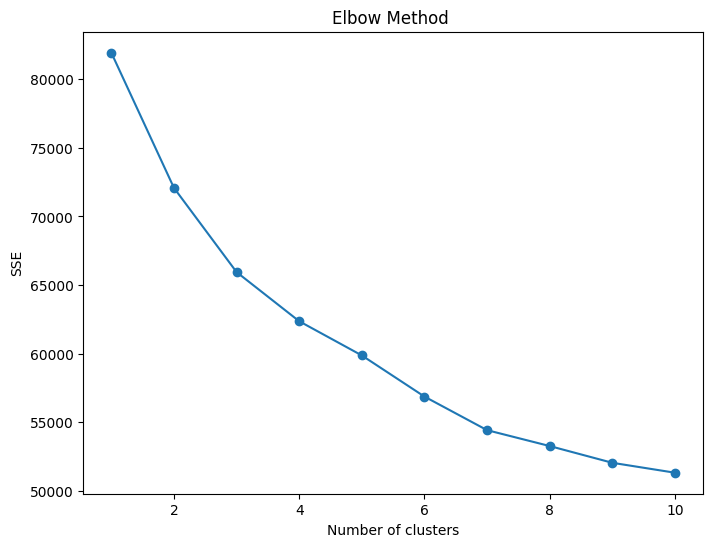

In [ ]:
# Elbow method for KMeans (using sample)
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=1)  # n_init=1 for speed
    kmeans.fit(processed_sample)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method ')
plt.show()

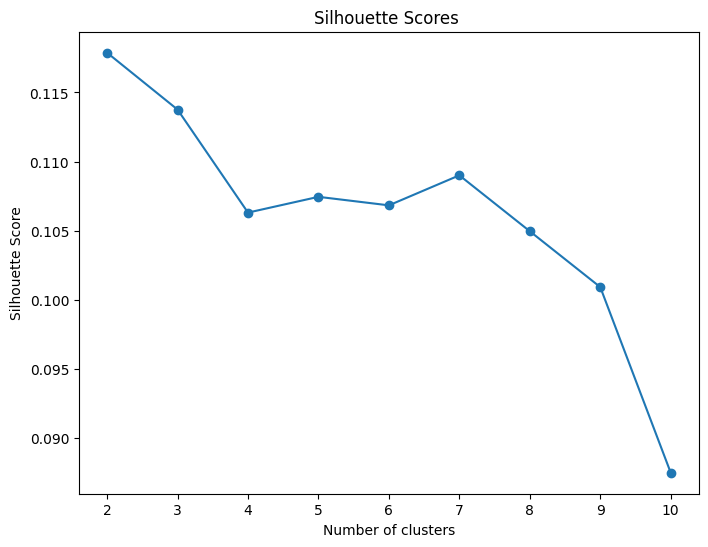

Suggested optimal k: 2


In [ ]:
# Silhouette scores (using sample, n_init=1 for speed)
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=1)
    labels = kmeans.fit_predict(processed_sample)
    sil_scores.append(silhouette_score(processed_sample, labels))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores ')
plt.show()

optimal_k = np.argmax(sil_scores) + 2
print(f'Suggested optimal k: {optimal_k}')

In [ ]:
# KMeans on  data with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(processed_df)

In [ ]:
# Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
agg_labels = agg.fit_predict(processed_sample)  # Use sample to avoid long runtime

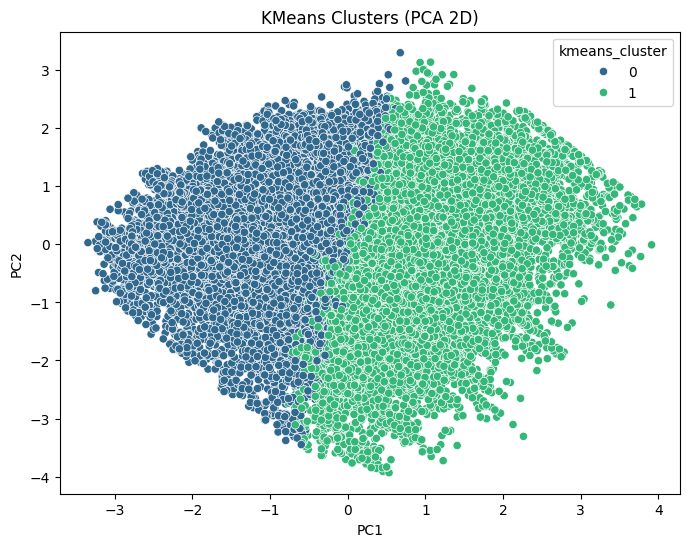

In [ ]:
# For visualization
pca_df['kmeans_cluster'] = kmeans_labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='kmeans_cluster', data=pca_df, palette='viridis')
plt.title('KMeans Clusters (PCA 2D)')
plt.show()

**Interpretation & Profiling**

**For each cluster, describe common attributes**

We use KMeans labels for interpretation. Compute means for numerical and modes for categorical.

**Compare with Income**
Cross-tabulate clusters with income (>50K or <=50K).


In [ ]:
# Add cluster labels
original_df['cluster'] = kmeans_labels

# Numerical profiles
num_profile = original_df.groupby('cluster')[numerical_cols].mean()
print('Numerical Profiles:')
print(num_profile)

# Categorical profiles (mode)
cat_profile = original_df.groupby('cluster')[categorical_cols].agg(lambda x: x.mode()[0])
print('\nCategorical Profiles:')
print(cat_profile)

Numerical Profiles:
               age         fnlwgt  education-num  capital-gain  capital-loss  \
cluster                                                                        
0        30.629319  198339.211787       9.541441           0.0           0.0   
1        45.520623  176538.575054      10.635659           0.0           0.0   

         hours-per-week  
cluster                  
0             38.296829  
1             43.635292  

Categorical Profiles:
        workclass education      marital-status      occupation  \
cluster                                                           
0         Private   HS-grad       Never-married    Adm-clerical   
1         Private   HS-grad  Married-civ-spouse  Prof-specialty   

          relationship   race     sex native-country  
cluster                                               
0        Not-in-family  White  Female  United-States  
1              Husband  White    Male  United-States  
